### 時系列データ

一般に時間の経過とともに観察されたデータを**時系列データ**という。  
例えば、毎月の消費者物価指数、毎日の最高気温を一定期間、観測したものは時系列データである。

### 平均、分散、自己共分散

期間$t=1, 2, ..., T$で観測される時系列データを$T_1, T_2, ..., Y_T$とする。  
観測時点を固定した$Y_t$は各々、確率変数となり、平均や分散を求めることができる。  
一般に平均や分散は観測時点tに依存するので、
$$
E[Y_t] = u_t, \quad
V[Y_t] = σ_t^2
$$
のように表記される。また、時系列データは、同一変数の異なる時点($Y_t$と$Y_{t-1}$など)の共分散や相関係数で特徴付けられることがしばしばある。  
同一データの異なる時点の共分散を**自己共分散**、相関係数は**自己相関係数**という。
$$  
Cov[Y_t,Y_{t-h}] = γ_{t,h}, \quad
ρ[Y_t,Y_{t-h}] = \frac{Cov[Y_t,Y_{t-h}]}{\sqrt{V[Y_t]*V[Y_{t-h}]}} = ρ_{t,h}
$$
は、それぞれ時点tにおけるh次の自己共分散、時点tにおけるh次の自己相関係数である。時間差hは**ラグ**と呼ばれる

### 定常性

時系列データの平均と分散が有限で、平均が観測時点tには依存せず、また、自己共分散(したがって自己相関係数)も観測時点tには依存せずに時間差hのみに依存する場合、その系列は**共分散定常過程**もしくは**弱定常過程**と呼ばれる。  
一方、任意の整数$h_1, h_2, ..., h_n$に対して、$\{Y_t, Y_{t-h1}, Y_{t-h2}, ..., Y_{t-hn}\}$の同時分布が時点tには依存せず、時間差$h_1, h_2, ... ,h_n$にのみ依存する場合、$\{Y_t\}$は**強定常過程**と呼ばれる。平均と分散が有限な強定常過程は、弱定常過程でもあるが、逆は必ずしも成り立たない。

### ホワイトノイズ

共分散定常過程の平均が$0$、$h\neq0$のすべての自己共分散が$0$である場合、その系列を**ホワイトノイズ**という。  
例えば、$Y_1, Y_2, ..., Y_T$が互いに独立で平均$0$、分散$1$の同一分布に従う場合(*i.i.d*)、$\{Y_t\}$はホワイトノイズである。  
ホワイトノイズは、時系列データを用いた回帰分析では、しばしば誤差項が満たすべき仮定として想定される。

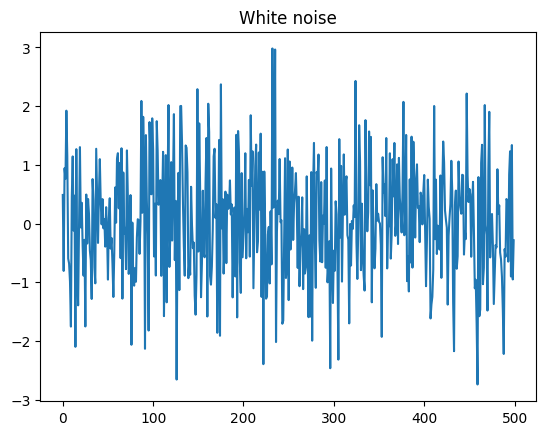

In [1]:
# ホワイトノイズを描画する
from random import gauss
import matplotlib.pyplot as plt

whitenoise = [gauss(mu=0.0, sigma=1.0) for i in range(500)]
plt.title("White noise")
plt.plot(whitenoise)
plt.show()

### 自己回帰(AR：Auto Regressive)過程

ホワイトノイズは共分散定常過程の代表的なものの一つであるが、これだけで表現できない時系列データも存在する。  
自己相関係数が高い時系列データを表現する代表的なものの一つとして**自己回帰過程**がある。  
最もシンプルなものは、1次の自己回帰過程(AR(1)過程)であり、以下のように表現される。  
$$
Y_t = φ_1Y_{t-1} + U_t (t=1, 2, ..., T)
$$
ここで、$\{U_t\}$は系列$\{Y_t\}$を生成するショックと呼ばれ、ホワイトノイズと過程される。

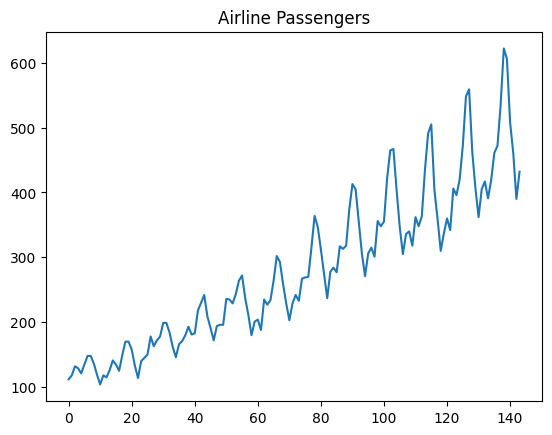

In [2]:
# airlineデータセットを描画
import pandas as pd
import statsmodels.api as sm
from sktime.datasets import load_airline

airline_data = load_airline()
airline_df = pd.DataFrame(
        airline_data,
    )
airline_df.columns = ["Passengers"]
airline_df = airline_df.reset_index("Period")

plt.plot(airline_df["Passengers"])
plt.title("Airline Passengers")
plt.show()

### 移動平均(MA：Moving Average)過程

AR過程と異なり、$Y_t$が現在と過去のショックの加重和で生成されている系列を**移動平均過程**という。  
次の移動平均過程は、$\{U_t\}$はホワイトノイズとして、
$$
Y_t = U_t+θ_1U_t-1
$$
と表現される

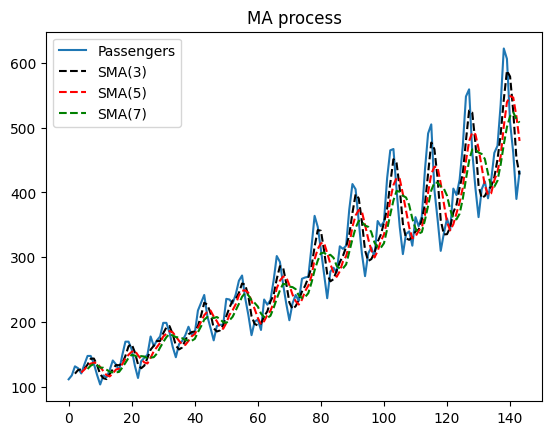

In [3]:
# 移動平均を計算
airline_df["3ma"]=airline_df["Passengers"].rolling(3).mean().round(1)
airline_df["5ma"]=airline_df["Passengers"].rolling(5).mean().round(1)
airline_df["7ma"]=airline_df["Passengers"].rolling(7).mean().round(1)

# 移動平均データを描画
plt.plot(airline_df["Passengers"], label="Passengers")
plt.plot(airline_df["3ma"], "k--", label="SMA(3)")
plt.plot(airline_df["5ma"], "r--", label="SMA(5)")
plt.plot(airline_df["7ma"], "g--", label="SMA(7)")
plt.title("MA process")
plt.legend()
plt.show()

### 自己回帰移動平均(ARMA:Auto Regressive Moving Average)過程

AR過程とMA過程を組み合わせれば、より複雑な(p,q)次の**自己回帰移動平均過程**を考えることができる。  
$$
Y_t = c+φ_1Y_{t-1} + ... + φ_pY_{t-p} + U_t + θ_1U_{t-1} + ... + θ_qU_{t-q}
$$
(p,q)次の自己回帰移動平均過程はARMA(p,q)過程と呼ばれる。  
比較的低次のARMA$(p,q)$過程でも複雑な自己共分散構造を表現できるので、ARMAモデルはこれまでに様々な実証研究でも用いられている。

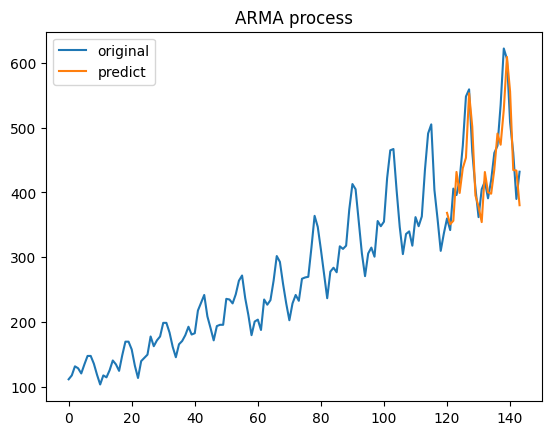

In [4]:
from statsmodels.tsa.arima.model import ARIMA

train = airline_df["Passengers"].values

# lag:8, ma:2
arma_model = ARIMA(train, order=(8,0,2)).fit(method_kwargs={"warn_convergence": False})
pred = arma_model.predict(start=120, end=144)
pred_df = pd.DataFrame(pred)
pred_df["index"] = pd.Series(range(120, 144))
pred_df = pred_df.set_index("index")

# 実データと予測データを可視化
plt.plot(train, label="original")
plt.plot(pred_df, label="predict")
plt.title("ARMA process")
plt.legend()
plt.show()

一方、時系列データによっては、$\{Y_t\}$が共分散定常ではなく、**階差**をとった$\{ΔY_t\}$が共分散定常であるとみなされる場合もある。  
このような場合、$ΔY_t$がARMA(p,q)過程
$$
ΔY_t = φ_1ΔY_{t-1} + ... + φ_pΔY_{t-p} + U_t + θ_1U_{t-1} + θ_q + U_{t-q}
$$
に従っていると想定して分析が進められる。  
これは(p,1,q)次の**自己回帰和分移動平均(ARIMA)過程**と呼ばれる。

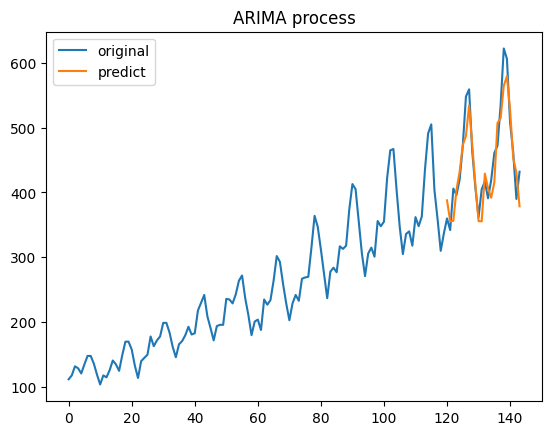

In [6]:
# lag:8, d:2, ma:2
arima_model = ARIMA(train, order=(8,2,2)).fit(method_kwargs={"warn_convergence": False})
pred = arima_model.predict(start=120, end=144)
pred_df = pd.DataFrame(pred)
pred_df["index"] = pd.Series(range(120, 144))
pred_df = pred_df.set_index("index")

# 実データと予測データを可視化
plt.plot(train, label="original")
plt.plot(pred_df, label="predict")
plt.title("ARIMA process")
plt.legend()
plt.show()

階差を取るかどうかは、原データと階差データをプロットして比較して決められることもあるが、実際の分析では、本当に階差をとってよいのか、判断が難しいことも多い。  
AR(1)過程の共分散定常性の条件は$|φ_1|<1$であったが、階差をとる必要があるのは、$φ_1=1$の場合である。  
従って、φ1=1を帰無仮説、$|φ_1|<1$を対立仮説として仮説検定を行い、階差を取るかどうかの判断を行うことができる。  
このような検定は**単位根検定**と呼ばれ、特に$φ_1=1$のt検定は実証研究で広く用いられており、**ディッキーフラー検定**と呼ばれる。

### ラグ多項式

ARMA過程を表現する場合、**ラグオペレータ**もしくは**バックシフトオペレータ**を用いると便利なことがある。  
ラグオペレータLは、$LY_t=Y_{t-1}$と定義されるので、ARMA(p,q)過程は、**ラグ多項式**
$$
φ(L) = 1-φ_1L-φ_2L^2 - ... - φ_pL^p \quad
θ(L) = 1 + θ_1L + θ_2L^2 + ... + θ_qL^q 
$$
を用いて、$φ(L)Y_t = c + θ(L)U_t$と表現できる。

### 推定と統計的推測

AR(p)過程の推定方法は、主に、最小二乗法と最尤推定法の2通りである。  
得られた最小二乗推定量や最尤推定量は、ARやMAの次数が正しければ、$T\rightarrow∞$のもとで一致推定量である。  
また、漸近正規性も成り立ち、t検定やワルド検定など、漸近論に基づく標準的な統計的推測を行うことができる。

### 次数の決定

ARMA過程の次数の選択は推定量の一致性に影響を与えるため非常に重要である。  
例えば、AR(1)、AR(2)、ARMA(1,1)過程の場合、自己相関係数は幾何級数的に減衰して0に近づいてゆくが、MA(1)、MA(2)過程の場合は、2次以上、3次以上の自己相関係数は0となる。  
従って、得られたデータから標本自己相関係数を求めて2次もしくは3次以上で有意に0と異なるかどうかで、MA過程を選択するか判断できる。  
なお、実際のデータから求められた標本自己相関係数の図を**コレログラム**という。

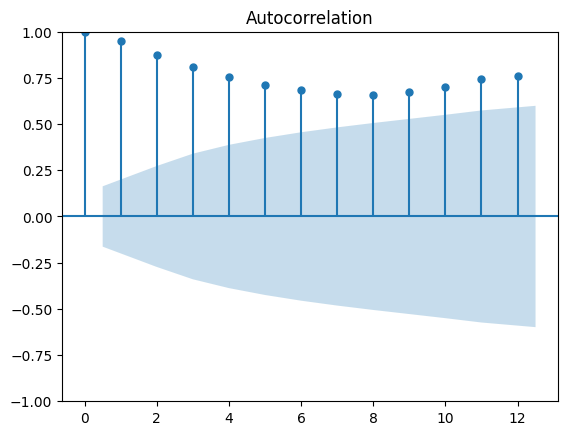

In [7]:
# コレログラムを描画
fig = sm.graphics.tsa.plot_acf(airline_df["Passengers"], lags=12)

薄青の空間は、真に自己相関がない場合の信頼区間95%の範囲  
つまり、この範囲外の値を持つlag地点に（統計的に）有意な自己相関があるといえる  
このデータについては、$lag=12$で全区間で有意な自己相関あり

一方、**偏自己相関係数**は、AR過程の次数選択に有用である。  
h次の偏自己相関係数とは、$Y_t$から$Y_{t-1}, ..., Y_{t-h+1}$ の影響を取り除いたもの(回帰の残差)と、$Y_{t-h}$から$Y_{t-1}, ..., Y_{t-h+1}$の影響を取り除いたもの(回帰の残差)との相関係数である。  
AR(p)過程の偏自己相関係数は、$p+1$以上は全て0であるが、MA(q)過程やARMA(p,q)過程の偏自己相関係数は幾何級数的に減衰することが分かっている。  
従って、標本偏自己相関係数を求めて、２次もしくは3次以上で有意に0となるかどうかで、AR過程かどうかを選択する判断ができる。

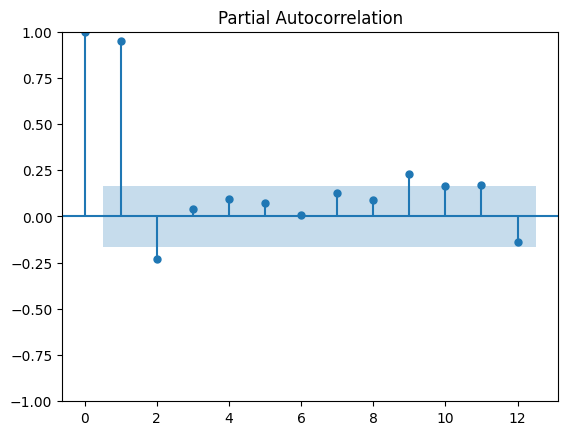

In [8]:
# 偏自己相関係数のコレログラムを描画
fig = sm.graphics.tsa.plot_pacf(airline_df["Passengers"], lags=12, method='ywm')

まとめると以下の通り
| 自己相関係数 | 偏自己相関係数 | 選択モデル |
| ---- | ---- | ---- |
|  2次以降0 | ゆっくりと減衰 | MA(1) |
|  3次以降0 | ゆっくりと減衰 | MA(2) |
|  ゆっくりと減衰 | 2次以降0 | AR(1) |
|  ゆっくりと減衰 | 3次以降0 | AR(2) |
|  ゆっくりと減衰 | ゆっくりと減衰 | ARMA(1) |

### スペクトラム

ARMAモデルのように$Y_t$を過去の$Y_{t-h}$や現在と過去のショック$U_{t-h}$でモデル化して分析する手法は時間領域での分析といわれる。  
一方$Y_t$の変動を$sin(λt)$や$cos(λt)$などの周波関数を用いて分析する手法を周波数領域での分析という。  
ここでは、$\{Y_t\}$の自己共分散$γh$について、$\sum_{h=-∞}^{∞}|γh|<∞$を満たすと仮定する。  
有限次元の共分散定常ARMA過程は、この仮定を満たしている。  
この時、$\{Y_t\}$の**スペクトラム**または**スペクトル密度関数**は、
$$
f(λ) = \frac{1}{2π}\sum_{h=-∞}^{∞}γhe^{-iλh}
$$
で定義される。

### ペリオドグラム

スペクトラムは真の自己共分散を用いて定義されたが、実際の観測値$y_1, y_2, ..., y_T$を用いて作成された。  
$$
f(λ) = \frac{1}{2π}\sum_{h=-T+1}^{T-1}\hat{γ}he^{-iλh}
$$
を**ペリオドグラム**という。

### 状態空間モデル

ARIMA過程よりも複雑な時系列モデルの例として、**状態空間モデル**がある。  
例えば、回帰モデルの回帰係数が変動するような可変パラメータモデルは、次のように記述できる。  
$$
Y_t = X_t^TB_t + U_t
$$
$$
B_t = ΦB_{t-1} + V_t
$$
ただし、$X_t$は$K$次元の説明変数であり、$B_t$はK次元回帰係数で、時点tに依存する。  
上記の前者の式は**観測方程式**、後者の式は**状態方程式**もしくは**遷移方程式**と呼ばれる。  
これらを合わせて、**状態空間モデル**という。  
$\{Y_t\}$は観測される系列であるが、$B_t$は観測されずに時点tに依存するため、最小二乗法では未知パラメータの推定はできない。  
$B_t$の推定には、カルマンフィルターという手法が用いられる。


### ダービン・ワトソン検定

時系列データを用いた以下の回帰モデルを考える。  
$Y_t = B_1 + B_2X_{2t} + ... + B_kX_{Kt} + U_t$は線形回帰モデルであるため、最小二乗法で推定できる。  
ただし、最小二乗推定量の最小分散性が成り立つためには、$\{Ut\}$がホワイトノイズでなければならない。  
$\{U_T\}$がホワイトノイズではなく、自己共分散が0でない場合は、最小二乗推定量は用いず、$\{U_T\}$の自己相関構造を考慮した最尤法や一般化最小二乗法を用いたが効率的な推定ができる。  
一般に、回帰モデルの誤差項$\{U_T\}$がホワイトノイズではなく、自己共分散が0ではない場合、誤差項には**自己相関**もしくは**系列相関**があると言われている。  
誤差項に自己相関があるかどうかの仮説検定としては、**ダービン・ワトソン検定**が行なわれることがある。  
ダービン・ワトソン検定では、誤差項にAR(1)モデルを想定する
$$
U_t = ρU_{t-1} + ε_t
$$
ただし、$\{ε_t\}$はホワイトノイズである。  
$\{U_T\}$は共分散定常であると想定するが、まずは$0 \leq ρ < 1$の場合を考える。  
この場合、$\{U_T\}$は$ρ=0$の場合に、ホワイトノイズとなるので、ダービン・ワトソン検定では帰無仮説と対立仮説を
$$
H_0:ρ = 0 \quad vs \quad
H_1:ρ > 0 
$$
と想定する。  
まず上記の線形回帰モデルを最小二乗法で推定し、得られた残差を$\hat{U_t}$とする。  
この残差を用いて、**ダービン・ワトソン比**を検定統計量として用いる。
$$
DW = \frac{\sum_{t=2}^{T}(\hat{U_t}-\hat{U}_{t-1})^2}{\sum_{t=1}^{T}\hat{U_t}^2}
$$
の値が2より十分小さな場合に帰無仮説を棄却する。